# BUILDING A MULTILAYER PERCEPTRON NETWORK

In [ ]:
import numpy as np 
from tensorflow.keras import datasets, utils

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:

from tensorflow.keras import layers, models

'''
Using Sequential Model
'''
# model = model.Sequential([
#     layers.flatten(input_shape = (32,32,3)),
#     layers.Dense(200, activation='relu'),
#     layers.Dense(150, activation='relu'),
#     layers.Dense(10, activation='softmax'),
# ])

'''
Using functional API, because it will serve better in the long run
'''

input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation='relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)

model = models.Model(input_layer, output_layer)


### 🧠 Model Summary with Input/Output Shapes and Parameter Calculations

| Layer (type) | Input Shape       | Output Shape    | Param # | Calculation                          |
|--------------|-------------------|------------------|---------|--------------------------------------|
| InputLayer   | (None, 32, 32, 3) | (None, 32, 32, 3) | 0       | No parameters                        |
| Flatten      | (None, 32, 32, 3) | (None, 3072)     | 0       | Just reshapes input                  |
| Dense (200)  | (None, 3072)      | (None, 200)      | 614,600 | (3072 × 200) + 200 = 614,400 + 200   |
| Dense (150)  | (None, 200)       | (None, 150)      | 30,150  | (200 × 150) + 150 = 30,000 + 150     |
| Dense (10)   | (None, 150)       | (None, 10)       | 1,510   | (150 × 10) + 10 = 1,500 + 10         |

**Total params:** 646,260  
**Trainable params:** 646,260  
**Non-trainable params:** 0


In [19]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate= 0.005)
model.compile(loss='categorical_crossentropy', optimizer=opt)


# Loss Functions: How "Wrong" is the Model? 🧐

## For Regression (Predicting Numbers)

- **Mean Squared Error (MSE)**  
  - Penalizes large errors heavily (big mistakes hurt a lot)  

- **Mean Absolute Error (MAE)**  
  - Treats all errors equally, good if you have outliers/anomalies  


## For Classification (Predicting Categories)

- **Binary Cross-Entropy**  
  - Used for 2-class problems (Yes/No, True/False)  
  - Measures difference between predicted probabilities and true labels

- **Categorical Cross-Entropy**  
  - For multi-class problems (e.g., Cat/Dog/Bird)  
  - Generalizes binary cross-entropy for multiple classes

# Optimizers: How the Model Learns 🧠

- **Stochastic Gradient Descent (SGD)**  
  - Classic optimizer  
  - Updates weights using gradient from one sample or mini-batch  
  - Can get stuck or be slow

- **SGD with Momentum**  
  - Adds fraction of previous update to current step  
  - Helps speed up learning and escape local minima

- **RMSprop**  
  - Adaptive learning rate optimizer  
  - Divides by moving average of recent squared gradients  
  - Good for RNNs

- **Adam (Adaptive Moment Estimation)**  
  - Combines Momentum + RMSprop ideas  
  - Keeps track of average of past gradients (1st moment) and squared gradients (2nd moment)  
  - Fast, reliable, and popular choice



In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.7119
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7082
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.7014
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7015
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.6872
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7095
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6953
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6942
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6858
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6886


- **`model.fit()`**  
  The main method to train your model using the training data.

- **`X_train`**  
  Input features for training (e.g., images, numbers, text).

- **`y_train`**  
  Target labels or values the model tries to predict.

- **`batch_size=32`**  
  Number of samples processed before the model updates its weights.  
  - Smaller batches → more frequent, noisier updates  
  - Larger batches → smoother updates but higher memory use

- **`epochs=10`**  
  Number of times the model will see the entire dataset.  
  Here, the model goes through the full data **10 times**.

- **`shuffle=True`**  
  Randomly reorders training data before each epoch to prevent the model from learning order-specific patterns.


In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.7172


1.7278165817260742

In [24]:
'''
viewing predictions as the test set using PREDICT method
'''

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(X_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step


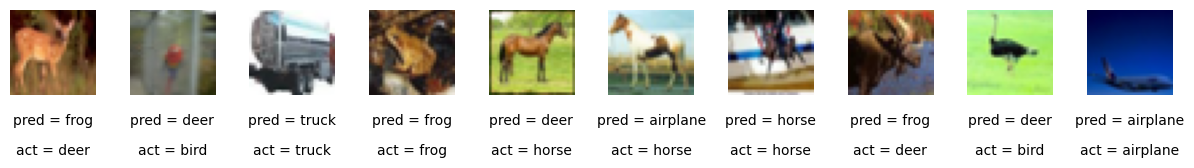

In [27]:
'''
Displaying predictions of the MLP against actual label
'''

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)
